In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest

In [2]:
df = pd.read_csv('conjunto_de_datos_defunciones_registradas_2018.csv')

In [3]:
#Número de registros y número de atributos
df.shape

(722611, 62)

In [4]:
df.head()

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,Unnamed: 59,escolarida.1,diferencias
0,1,1,32,10,13,1,1,1,15,1,...,2,88,88,888,8888,0,999,NaN,4,0
1,1,1,1,1,15,1,1,1,15,1,...,2,88,88,888,8888,0,999,NaN,4,0
2,1,1,1,1,15,1,1,1,15,1,...,1,88,88,888,8888,0,999,NaN,4,-1
3,1,1,1,1,15,1,1,1,15,1,...,1,88,88,888,8888,0,999,NaN,6,0
4,1,1,1,1,15,1,1,1,15,1,...,1,88,88,888,8888,0,999,NaN,9,0


In [5]:
df.columns

Index(['ent_regis', 'mun_regis', 'ent_resid', 'mun_resid', 'tloc_resid',
       'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr', 'loc_ocurr',
       'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida', 'edo_civil',
       'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia', 'asist_medi',
       'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab', 'embarazo',
       'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo', 'lista1',
       'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax', 'Unnamed: 59', 'escolarida.1', 'diferencias'],
      dtype='object')

In [6]:
#Eliminamos duplicados
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
# Nuevo numero de registros y atributos
df.shape

(722355, 62)

In [8]:
#Atributos con porcentaje de valores faltantes
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        #print(pct_missing)
        print('{} - {}%'.format(col, round(pct_missing*100)))

maternas - 100.0%
Unnamed: 59 - 100.0%


In [9]:
#Filtro atributos con faltantes 100%
df = df.drop(columns = ['maternas', 'Unnamed: 59'])

In [10]:
#Atributos con cantidad de valores que pueden tomar
for col in df.columns:
    unique_values=len(df[col].value_counts())
    if (unique_values > 0):
        #print(pct_missing)
        print('{} - {}'.format(col, round(unique_values)))

ent_regis - 32
mun_regis - 560
ent_resid - 36
mun_resid - 570
tloc_resid - 18
loc_resid - 781
ent_ocurr - 33
mun_ocurr - 566
tloc_ocurr - 18
loc_ocurr - 607
causa_def - 4026
lista_mex - 319
sexo - 3
edad - 187
dia_ocurr - 32
mes_ocurr - 13
anio_ocur - 63
dia_regis - 32
mes_regis - 12
anio_regis - 1
dia_nacim - 32
mes_nacim - 13
anio_nacim - 123
ocupacion - 14
escolarida - 12
edo_civil - 8
presunto - 6
ocurr_trab - 4
lugar_ocur - 11
necropsia - 3
asist_medi - 3
sitio_ocur - 13
cond_cert - 7
nacionalid - 3
derechohab - 10
embarazo - 7
rel_emba - 4
horas - 25
minutos - 61
capitulo - 19
grupo - 33
lista1 - 84
gr_lismex - 56
vio_fami - 4
area_ur - 3
edad_agru - 30
complicaro - 4
dia_cert - 32
mes_cert - 13
anio_cert - 2
lengua - 4
cond_act - 4
par_agre - 30
ent_ocules - 34
mun_ocules - 347
loc_ocules - 218
razon_m - 2
dis_re_oax - 31
escolarida.1 - 12
diferencias - 7


In [11]:
#Filtro atributos con 1 sólo valor posible
df = df.drop(columns = ['razon_m', 'anio_regis', 'embarazo', 'rel_emba', 'complicaro', 'capitulo'])

In [12]:
#Filtro registros con valores faltantes
df = df.dropna(axis='index')

In [13]:
#Filtro para extraer registros de sexo femenino
df = df.loc[df.sexo==1].reset_index(drop=True)

In [14]:
#Filtro para extraer registros de mujeres de nacionalidad mexicana
df= df[df['nacionalid']==1.0].reset_index(drop=True)

In [15]:
#Filtro para extraer registros con causa de defunción en lista mexicana igual a Homicidio (agresión)
df = df.loc[df.lista_mex == '55'].reset_index(drop=True)

In [16]:
df.to_excel('feminicidios_2018.xlsx')

In [17]:
#Lista de claves de parentesco de agresores masculinos
Clave_par_agre_masculino = []
for i in range(32):
    Clave_par_agre_masculino.append((2*i)+1)
v = [64,65,66,67,68,70,71,72,88,99]
for j in v:
    Clave_par_agre_masculino.append(j)

In [18]:
#Número de valores de parenteso de agresor
df.par_agre.value_counts()

99    28008
72       96
3        14
17        9
71        9
66        7
70        7
33        6
2         6
12        5
67        5
5         4
15        4
4         3
68        3
31        2
11        2
27        2
13        2
37        1
41        1
50        1
45        1
14        1
1         1
32        1
Name: par_agre, dtype: int64

In [19]:
#Filtro para extraer registros de homicidios de mujeres mexicanas que su agresor tenga un parenteso y sea masculino
df = df[df['par_agre'].isin(Clave_par_agre_masculino)].reset_index(drop=True)

In [20]:
df

,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,dis_re_oax,escolarida.1,diferencias
0,1,1,1,7,1,7777,1,1,15,1,...,2018,2,1,99,99,999,9999,999,4,0
1,1,1,1,1,15,1,1,1,15,1,...,2018,2,1,99,1,1,1,999,6,0
2,1,1,1,1,15,1,1,1,15,1,...,2018,2,1,99,1,1,1,999,4,0
3,1,1,1,5,10,1,1,1,15,1,...,2018,9,1,99,1,5,1,999,9,-2
4,1,1,1,3,7,1,1,3,7,1,...,2018,2,1,99,1,3,1,999,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28179,32,17,32,29,6,1,32,22,7,1,...,2018,2,1,99,32,22,1,999,6,0
28180,32,17,32,46,1,56,32,46,1,56,...,2018,2,1,5,32,46,7777,999,4,-1
28181,32,17,99,999,99,9999,32,17,13,1,...,2018,2,1,99,32,38,1,999,99,0
28182,32,17,32,29,6,1,32,17,13,1,...,2018,2,1,99,32,17,1,999,6,0


In [21]:
#Causas de muerte únicas
info_causa_def = df.causa_def.value_counts()
Numero_causa_def_unicas_mujeres_mex = pd.DataFrame(info_causa_def).reset_index()
Numero_causa_def_unicas_mujeres_mex.columns = ['CVE', 'Cantidad']
Numero_causa_def_unicas_mujeres_mex

,CVE,Cantidad
0,X954,12234
1,X959,2980
2,X950,1911
3,X958,1689
4,X994,1539
...,...,...
116,Y087,1
117,X884,1
118,Y039,1
119,X945,1


In [22]:
#Tabla de causas de defuncion
causa_def = pd.read_excel('causa_defuncion.xlsx')
causa_def.head()

,CVE,DESCRIP
0,A000,"Cólera debido a Vibrio cholerae 01, biotipo ch..."
1,A001,"Cólera debido a Vibrio cholerae 01, biotipo el..."
2,A009,"Cólera, no especificado"
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea A


In [23]:
#Juntar causas únicas de defunción de mujeres mexicanas con el diccionario de causa_def
claves_causa_mujeres_mex = Numero_causa_def_unicas_mujeres_mex[['CVE']]
causas_def_mujeres_mex = pd.merge(causa_def, claves_causa_mujeres_mex, how='right', on=['CVE'])
causas_def_mujeres_mex

,CVE,DESCRIP
0,X854,"Agresión con drogas, medicamentos y sustancias..."
1,X859,"Agresión con drogas, medicamentos y sustancias..."
2,X860,Agresión con sustancia corrosiva en vivienda
3,X868,Agresión con sustancia corrosiva en otro lugar...
4,X870,Agresión con plaguicidas en vivienda
...,...,...
116,Y095,Agresión por medios no especificados en comerc...
117,Y096,Agresión por medios no especificados en área i...
118,Y097,Agresión por medios no especificados en granja
119,Y098,Agresión por medios no especificados en otro l...


In [24]:
#causas_def_mujeres_mex.to_excel('causas_def_mujeres_mex.xlsx')

In [25]:
le = LabelEncoder()
le.fit(causas_def_mujeres_mex['CVE'])
causas_def_mujeres_mex['CVE_le'] = le.transform(causas_def_mujeres_mex['CVE'])

In [26]:
causas_def_mujeres_mex

,CVE,DESCRIP,CVE_le
0,X854,"Agresión con drogas, medicamentos y sustancias...",0
1,X859,"Agresión con drogas, medicamentos y sustancias...",1
2,X860,Agresión con sustancia corrosiva en vivienda,2
3,X868,Agresión con sustancia corrosiva en otro lugar...,3
4,X870,Agresión con plaguicidas en vivienda,4
...,...,...,...
116,Y095,Agresión por medios no especificados en comerc...,116
117,Y096,Agresión por medios no especificados en área i...,117
118,Y097,Agresión por medios no especificados en granja,118
119,Y098,Agresión por medios no especificados en otro l...,119


In [27]:
#Diccionario de claves de causas de defuncion por homicidios de mujeres mexicanas
causa_def_mujes_mex_dict = dict(zip(causas_def_mujeres_mex.CVE, causas_def_mujeres_mex.CVE_le))

In [28]:
#Creamos una nueva columna causa_def_le que etiqueta con un número la causa de defuncion
df['causa_def_le'] = df['causa_def']
df = df.replace({'causa_def_le': causa_def_mujes_mex_dict})

In [29]:
#Quitamos los atributos de lista mexicana y grupo lista mexicana porque ya se tomaron los registros de agresion (homicidio)
df = df.drop(columns=['causa_def', 'lista_mex', 'gr_lismex'])

In [30]:
#Número de registros después de los filtros
df.shape

(28184, 52)

In [31]:
#Tipos de valores, todos numéricos
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ent_regis,int64
mun_regis,int64
ent_resid,int64
mun_resid,int64
tloc_resid,int64
loc_resid,int64
ent_ocurr,int64
mun_ocurr,int64
tloc_ocurr,int64
loc_ocurr,int64


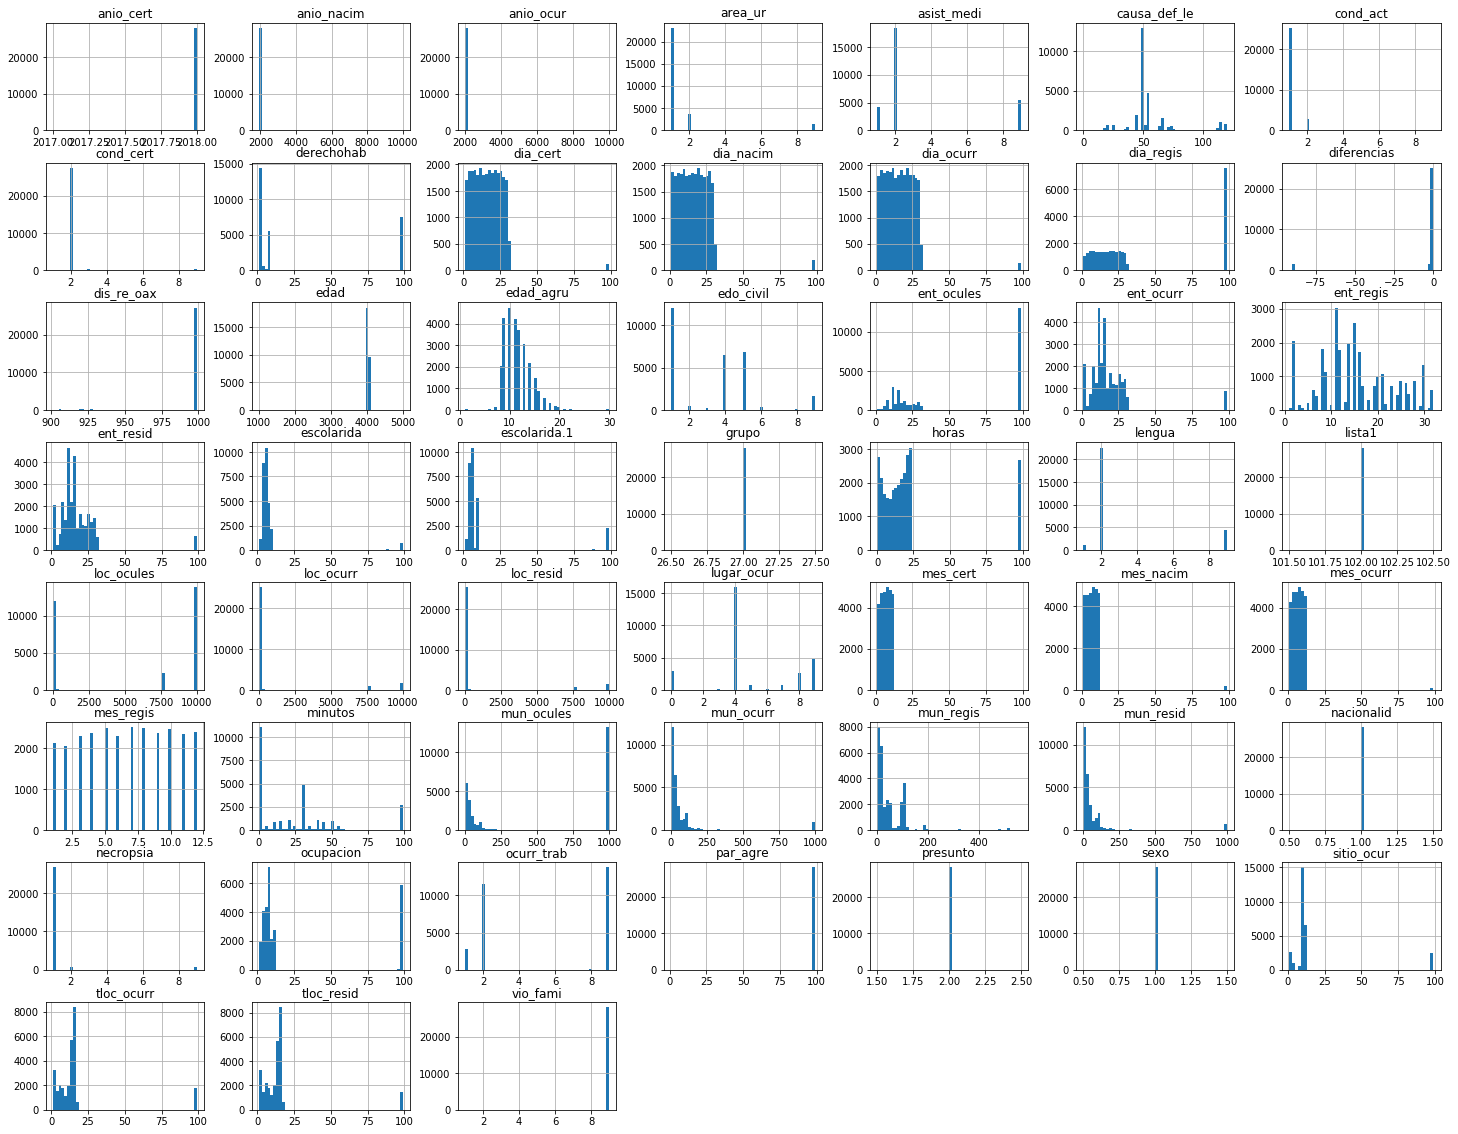

In [32]:
df.hist(bins=50, figsize=(25,20))
plt.show()

In [33]:
set(df.edad)

{1001,
 1004,
 1005,
 1097,
 2002,
 2020,
 2028,
 3001,
 3002,
 3003,
 3004,
 3005,
 3006,
 3007,
 3008,
 3011,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,
 4007,
 4008,
 4009,
 4010,
 4011,
 4012,
 4013,
 4014,
 4015,
 4016,
 4017,
 4018,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4034,
 4035,
 4036,
 4037,
 4038,
 4039,
 4040,
 4041,
 4042,
 4043,
 4044,
 4045,
 4046,
 4047,
 4048,
 4049,
 4050,
 4051,
 4052,
 4053,
 4054,
 4055,
 4056,
 4057,
 4058,
 4059,
 4060,
 4061,
 4062,
 4063,
 4064,
 4065,
 4066,
 4067,
 4068,
 4069,
 4070,
 4071,
 4072,
 4073,
 4074,
 4075,
 4076,
 4077,
 4078,
 4079,
 4080,
 4081,
 4082,
 4083,
 4084,
 4085,
 4086,
 4087,
 4088,
 4089,
 4090,
 4092,
 4094,
 4095,
 4096,
 4097,
 4099,
 4998}

In [34]:
#df.to_excel('feminicidios_mexico_2018.xlsx')

In [35]:
#Selección de variables para cluster

In [36]:
df2 = df[['area_ur','asist_medi','causa_def_le','derechohab','edad_agru','edo_civil','ent_regis','ent_resid','escolarida','horas','lugar_ocur','ent_ocurr','dia_ocurr','mes_ocurr','ocupacion','par_agre','sitio_ocur','vio_fami', 'tloc_ocurr']]
df2

,area_ur,asist_medi,causa_def_le,derechohab,edad_agru,edo_civil,ent_regis,ent_resid,escolarida,horas,lugar_ocur,ent_ocurr,dia_ocurr,mes_ocurr,ocupacion,par_agre,sitio_ocur,vio_fami,tloc_ocurr
0,2,2,26,2,17,5,1,1,4,1,9,1,26,5,98,99,99,9,15
1,1,2,49,7,8,1,1,1,6,0,4,1,1,12,98,99,10,9,15
2,1,2,17,99,9,4,1,1,4,23,0,1,16,6,98,99,12,9,15
3,1,9,73,2,14,1,1,1,7,3,0,1,24,6,5,99,11,9,15
4,1,2,49,1,9,1,1,1,4,20,4,1,17,3,9,99,10,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28179,1,1,49,1,13,5,32,32,6,7,4,32,17,11,6,99,99,9,7
28180,2,2,17,7,15,3,32,32,3,8,0,32,13,12,6,5,11,1,1
28181,9,2,71,99,30,9,32,99,99,99,8,32,22,9,98,99,12,9,13
28182,1,2,21,1,13,1,32,32,6,3,4,32,6,10,7,99,10,9,13


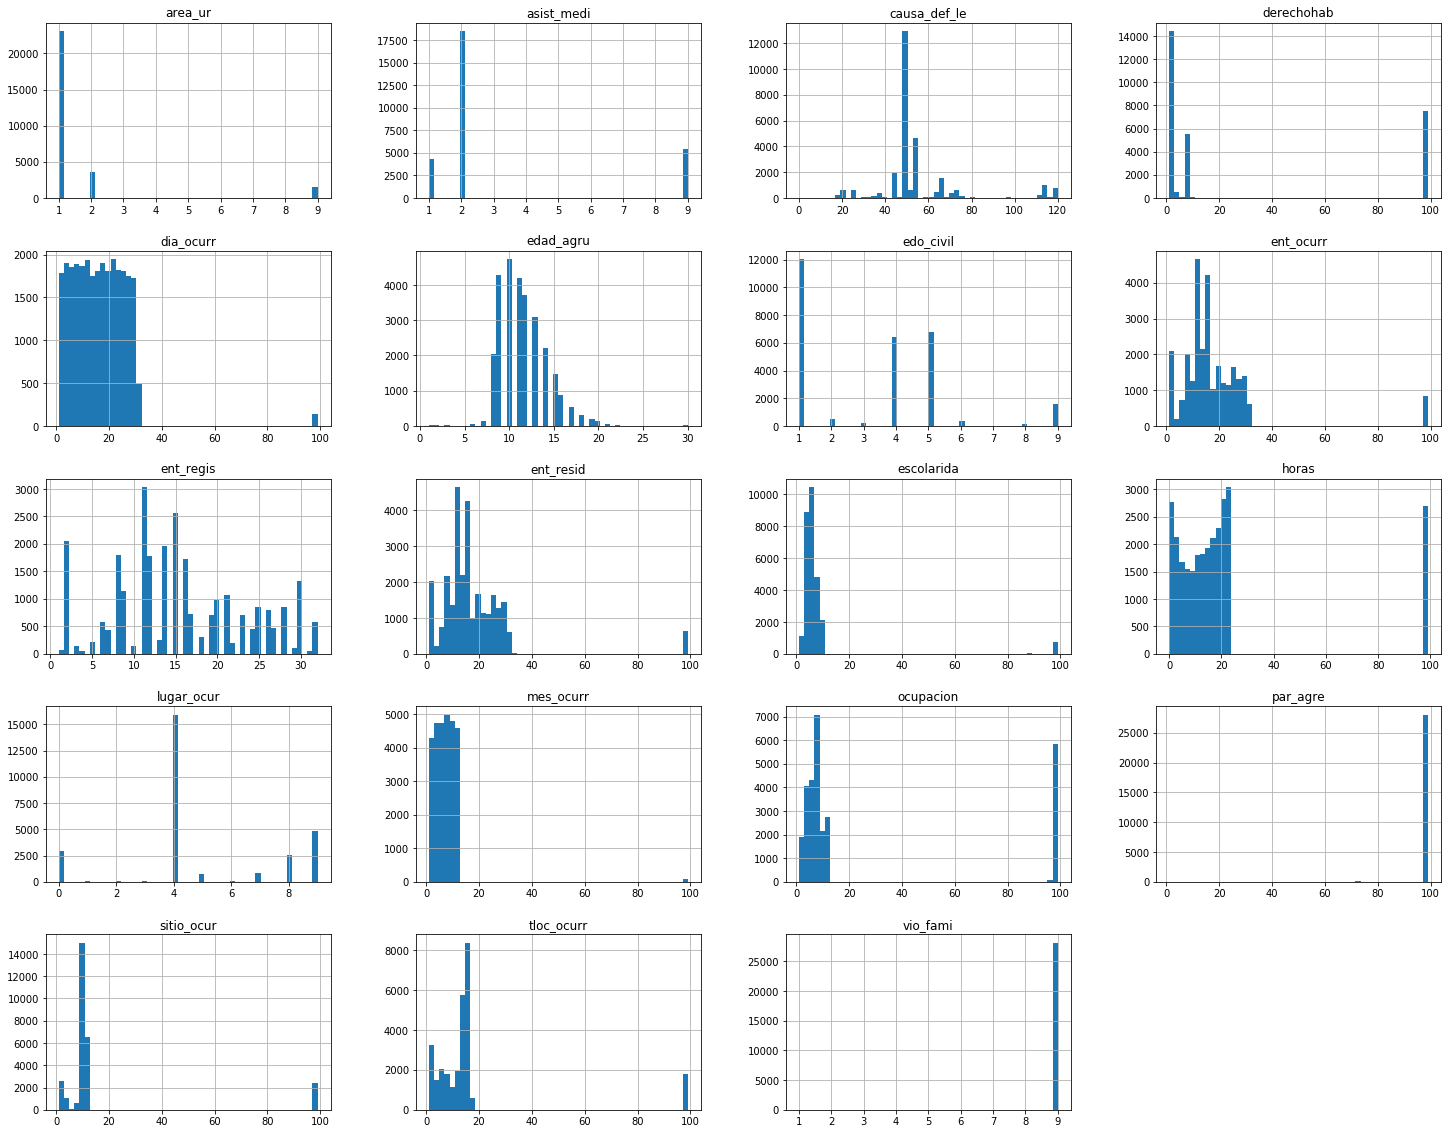

In [37]:
df2.hist(bins=50, figsize=(25,20))
plt.show()

In [38]:
#Valores que toma par_agre
valores_par_agre = [1, 3, 5, 11, 13, 15, 17, 27, 31, 33, 37, 41, 45, 66, 67, 68, 70, 71, 72, 99] 

nuevas_etiquetas_par_agre = []
for j in range(20):
    nuevas_etiquetas_par_agre.append(j+1)

#Diccionario de claves de causas de defuncion por homicidios de mujeres mexicanas
nueva_par_agre_dict = dict(zip(valores_par_agre, nuevas_etiquetas_par_agre))

df2 = df2.replace({'par_agre': nueva_par_agre_dict})

In [39]:
df2.area_ur = df2.area_ur.replace({9: 3})
df2.asist_medi = df2.asist_medi.replace({9: 3})
df2.derechohab = df2.derechohab.replace({99: 10})
df2.ent_resid = df2.ent_resid.replace({99: 35})
df2.escolarida = df2.escolarida.replace({99: 12,88:11})
df2.horas = df2.horas.replace({99:24})
df2.ent_ocurr = df2.ent_ocurr.replace({99:33})
df2.dia_ocurr = df2.dia_ocurr.replace({99:32})
df2.mes_ocurr = df2.mes_ocurr.replace({99:13})
df2.ocupacion = df2.ocupacion.replace({97:12, 98:13, 99:14})
df2.sitio_ocur = df2.sitio_ocur.replace({99:13})
df2.vio_fami = df2.vio_fami.replace({9: 3})
df2.tloc_ocurr = df2.tloc_ocurr.replace({99:18})
df2.sitio_ocur = df2.sitio_ocur.replace({99:13})

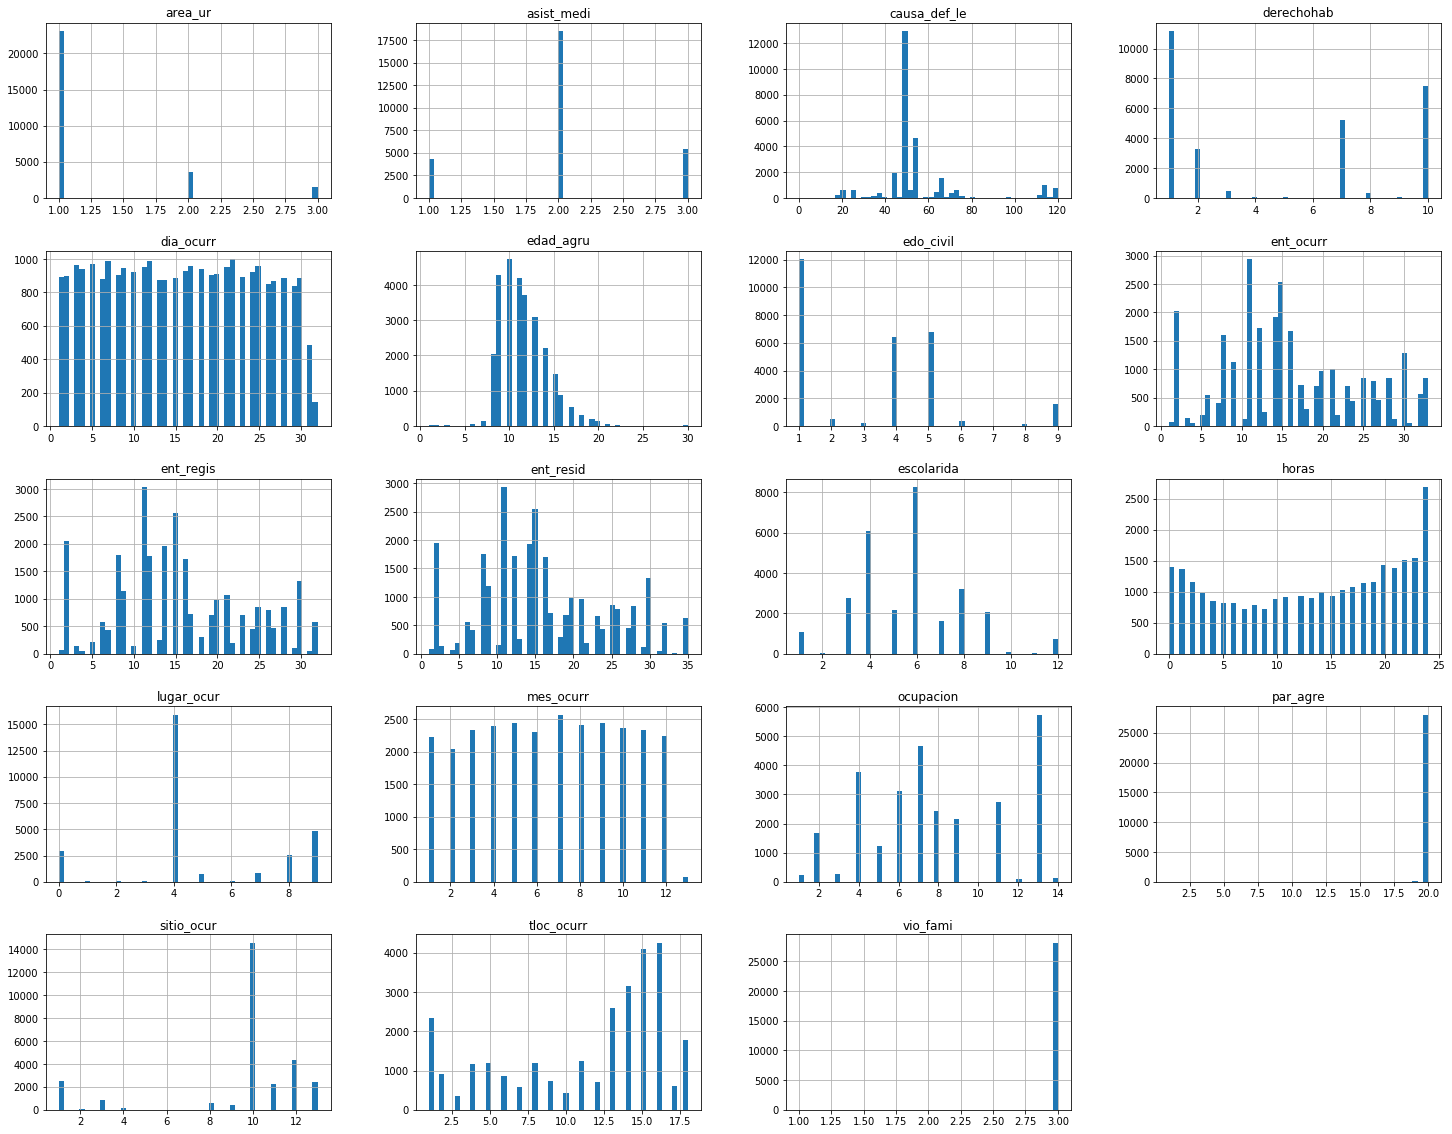

In [40]:
df2.hist(bins=50, figsize=(25,20))
plt.show()

In [41]:
df2.describe()

,area_ur,asist_medi,causa_def_le,derechohab,edad_agru,edo_civil,ent_regis,ent_resid,escolarida,horas,lugar_ocur,ent_ocurr,dia_ocurr,mes_ocurr,ocupacion,par_agre,sitio_ocur,vio_fami,tloc_ocurr
count,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000
mean,1.232437,2.039987,55.229031,4.773063,11.565214,3.244323,15.537078,15.977540,5.677512,13.311489,4.910800,16.109566,15.724737,6.573623,7.910233,19.967428,9.512241,2.995778,11.261496
std,0.531995,0.584909,20.007564,3.864360,2.701117,2.273510,7.879403,8.302577,2.208838,7.911430,2.636379,8.311532,8.819101,3.405140,3.485204,0.631358,3.222198,0.083500,5.307467
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,49.000000,1.000000,10.000000,1.000000,11.000000,11.000000,4.000000,6.000000,4.000000,11.000000,8.000000,4.000000,5.000000,20.000000,10.000000,3.000000,7.000000
50%,1.000000,2.000000,49.000000,2.000000,11.000000,4.000000,15.000000,15.000000,6.000000,14.000000,4.000000,15.000000,16.000000,7.000000,7.000000,20.000000,10.000000,3.000000,13.000000
75%,1.000000,2.000000,54.000000,10.000000,13.000000,5.000000,21.000000,21.000000,7.000000,21.000000,8.000000,22.000000,23.000000,9.000000,11.000000,20.000000,11.000000,3.000000,15.000000
max,3.000000,3.000000,120.000000,10.000000,30.000000,9.000000,32.000000,35.000000,12.000000,24.000000,9.000000,33.000000,32.000000,13.000000,14.000000,20.000000,13.000000,3.000000,18.000000


In [42]:
df3 = df2[['area_ur','causa_def_le','edad_agru','edo_civil','ent_resid','escolarida','ocupacion']]

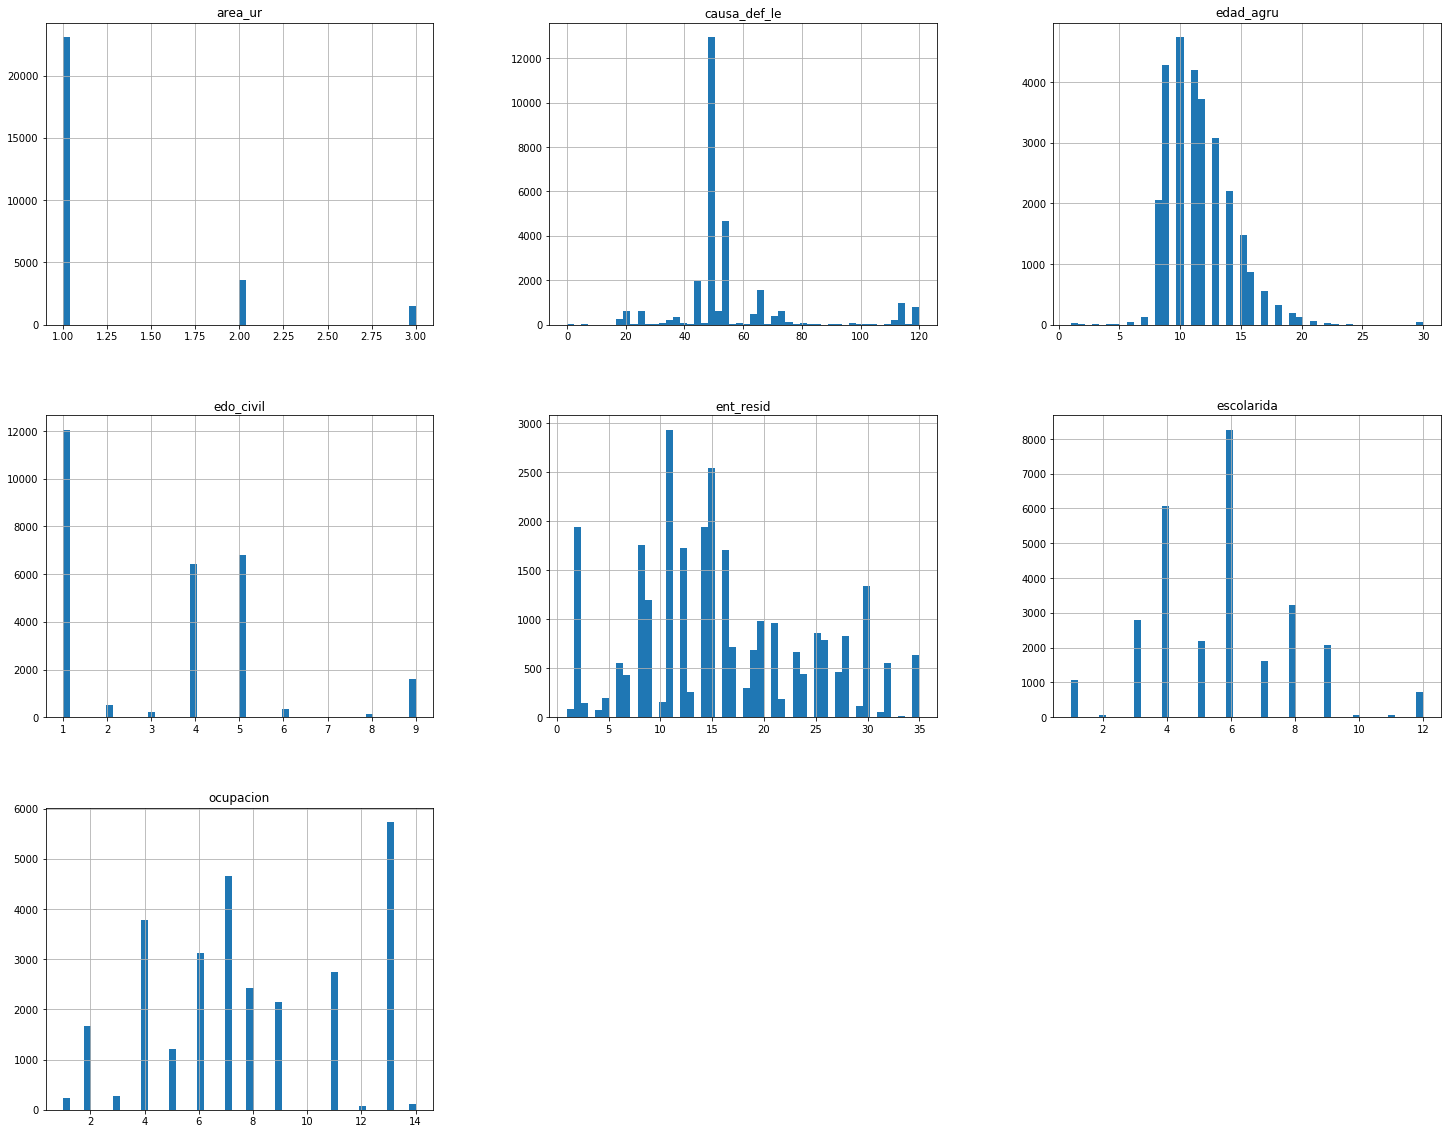

In [43]:
df3.hist(bins=50, figsize=(25,20))
plt.show()

In [44]:
df3.shape

(28184, 7)

In [45]:
df3 = df3.sample(frac=0.02, replace=False, random_state = 42).reset_index(drop=True)

In [46]:
df3.shape

(564, 7)

In [47]:
df3

,area_ur,causa_def_le,edad_agru,edo_civil,ent_resid,escolarida,ocupacion
0,1,45,11,1,24,4,2
1,1,49,12,1,15,5,8
2,1,49,9,1,19,6,11
3,3,49,11,4,28,7,8
4,1,49,9,9,8,4,6
...,...,...,...,...,...,...,...
559,1,49,10,1,15,7,8
560,1,50,14,4,9,6,9
561,1,34,10,4,7,6,13
562,1,49,8,1,16,7,2


In [48]:
#Cluster

In [49]:
varc = [x for x in df3.columns]

In [50]:
X = df3[varc].copy()

In [51]:
X.reset_index(drop=True,inplace=True)

In [52]:
sc = MinMaxScaler()

In [53]:
sc.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [55]:
X.describe()

,area_ur,causa_def_le,edad_agru,edo_civil,ent_resid,escolarida,ocupacion
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,1.230496,56.455674,11.599291,3.147163,16.157801,5.609929,8.076241
std,0.529814,20.381263,2.751857,2.276135,8.111452,2.184307,3.468642
min,1.000000,17.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,49.000000,10.000000,1.000000,11.000000,4.000000,6.000000
50%,1.000000,49.000000,11.000000,4.000000,15.000000,6.000000,7.000000
75%,1.000000,54.000000,13.000000,5.000000,21.000000,7.000000,11.000000
max,3.000000,120.000000,30.000000,9.000000,35.000000,12.000000,14.000000


In [56]:
Xs.describe()

,area_ur,causa_def_le,edad_agru,edo_civil,ent_resid,escolarida,ocupacion
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.115248,0.383065,0.342832,0.268395,0.445818,0.419084,0.544326
std,0.264907,0.197876,0.098281,0.284517,0.238572,0.198573,0.266819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.310680,0.285714,0.000000,0.294118,0.272727,0.384615
50%,0.000000,0.310680,0.321429,0.375000,0.411765,0.454545,0.461538
75%,0.000000,0.359223,0.392857,0.500000,0.588235,0.545455,0.769231
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


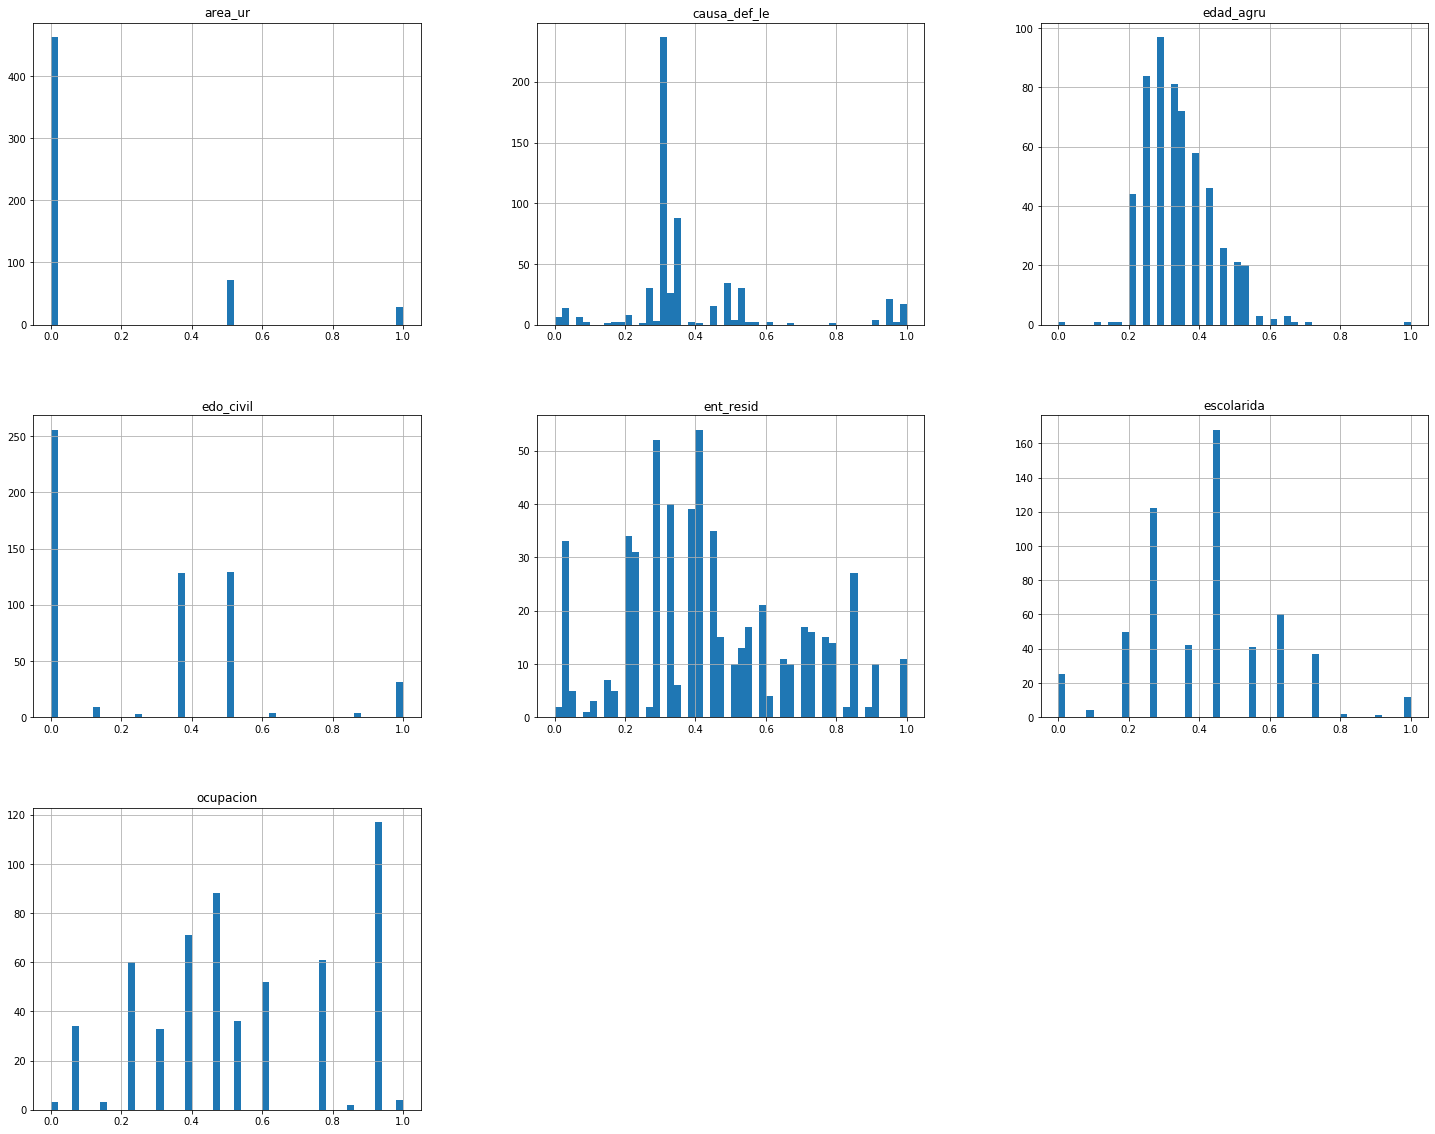

In [57]:
Xs.hist(bins=50, figsize=(25,20))
plt.show()

In [58]:
pi = make_pipeline(StandardScaler(),PCA())

In [59]:
pi.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [60]:
Xp = pd.DataFrame(pi.transform(X),columns=["p_%d"%(i+1) for i in range(len(X.columns))])

In [61]:
Xp.corr()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7
p_1,1.000000e+00,-4.866017e-16,7.672330e-17,-6.726210e-16,-3.217316e-16,-5.353675e-17,3.409239e-16
p_2,-4.866017e-16,1.000000e+00,2.285605e-16,5.576163e-16,-5.913512e-16,-6.070532e-17,1.946107e-16
p_3,7.672330e-17,2.285605e-16,1.000000e+00,-5.785440e-18,1.452849e-16,1.227246e-16,-3.896147e-16
p_4,-6.726210e-16,5.576163e-16,-5.785440e-18,1.000000e+00,3.149926e-16,-1.090863e-16,-8.221718e-17
p_5,-3.217316e-16,-5.913512e-16,1.452849e-16,3.149926e-16,1.000000e+00,-2.548352e-16,-1.903176e-16
p_6,-5.353675e-17,-6.070532e-17,1.227246e-16,-1.090863e-16,-2.548352e-16,1.000000e+00,-1.014857e-15
p_7,3.409239e-16,1.946107e-16,-3.896147e-16,-8.221718e-17,-1.903176e-16,-1.014857e-15,1.000000e+00


In [62]:
Xp.describe()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7
count,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02
mean,-4.724353e-18,-1.082664e-17,-1.270900e-17,4.291288e-17,-6.791258e-18,2.854297e-18,-2.244068e-17
std,1.188627e+00,1.105339e+00,1.034556e+00,1.010536e+00,9.297329e-01,8.537401e-01,8.325019e-01
min,-2.292068e+00,-3.686303e+00,-2.997682e+00,-2.409161e+00,-2.716365e+00,-2.798212e+00,-3.147616e+00
25%,-8.946071e-01,-6.430345e-01,-5.992524e-01,-7.488357e-01,-6.203021e-01,-4.951160e-01,-5.254279e-01
50%,-9.284338e-02,2.958526e-02,4.087418e-02,-1.212323e-01,-3.082072e-02,1.594434e-02,1.785293e-02
75%,7.052887e-01,6.686766e-01,6.940004e-01,7.420754e-01,6.295812e-01,5.226527e-01,4.803820e-01
max,6.860485e+00,4.380329e+00,3.197416e+00,3.015187e+00,3.522527e+00,3.050794e+00,3.319819e+00


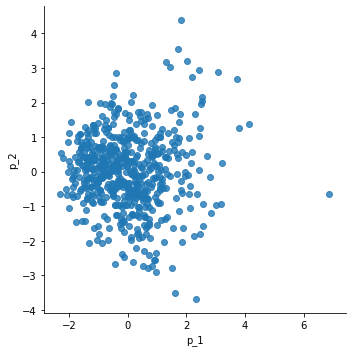

In [63]:
sns.lmplot(data=Xp,x='p_1',y='p_2',fit_reg=False)

In [64]:
pi.steps[1][1].explained_variance_ratio_.cumsum()

array([0.2014757 , 0.37570546, 0.52833528, 0.67395984, 0.79722707,
       0.90116705, 1.        ])

In [65]:
lst_in = []
for k in range(2,20):
    print(k)
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_in.append(cl.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


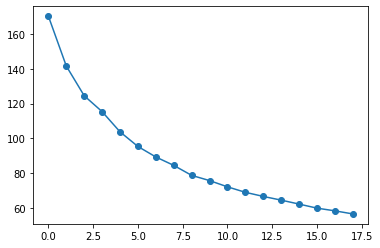

In [66]:
plt.plot(lst_in,marker='o')

In [67]:
cl = KMeans(n_clusters=4)

In [68]:
cl.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
df3['cl']= Xs['cl'] = X['cl'] = Xp['cl'] = cl.predict(Xs)

In [70]:
df3.head()

,area_ur,causa_def_le,edad_agru,edo_civil,ent_resid,escolarida,ocupacion,cl
0,1,45,11,1,24,4,2,3
1,1,49,12,1,15,5,8,3
2,1,49,9,1,19,6,11,0
3,3,49,11,4,28,7,8,1
4,1,49,9,9,8,4,6,2


In [71]:
df3.cl.value_counts(normalize=True)

2    0.301418
0    0.276596
3    0.253546
1    0.168440
Name: cl, dtype: float64

In [72]:
sk = SelectKBest(k=5)

In [73]:
sk.fit(Xs[varc],Xs['cl'])

SelectKBest(k=5, score_func=<function f_classif at 0x000001E511131708>)

In [74]:
var_best = [a for a,b in zip(varc,sk.get_support()) if b]

In [75]:
Xs[var_best+['cl']].groupby('cl').mean()

,area_ur,edad_agru,edo_civil,ent_resid,ocupacion
cl,,,,,
0,0.009615,0.328297,0.184295,0.389706,0.872781
1,0.652632,0.351504,0.359211,0.570588,0.492308
2,0.002941,0.365966,0.518382,0.449481,0.395023
3,0.006993,0.325425,0.002622,0.419786,0.398063


In [76]:
df3[var_best+['cl']].groupby('cl').mean()

,area_ur,edad_agru,edo_civil,ent_resid,ocupacion
cl,,,,,
0,1.019231,11.192308,2.474359,14.250000,12.346154
1,2.305263,11.842105,3.873684,20.400000,7.400000
2,1.005882,12.247059,5.147059,16.282353,6.135294
3,1.013986,11.111888,1.020979,15.272727,6.174825


In [77]:
pd.DataFrame(df3[var_best].mean()).T

,area_ur,edad_agru,edo_civil,ent_resid,ocupacion
0,1.230496,11.599291,3.147163,16.157801,8.076241


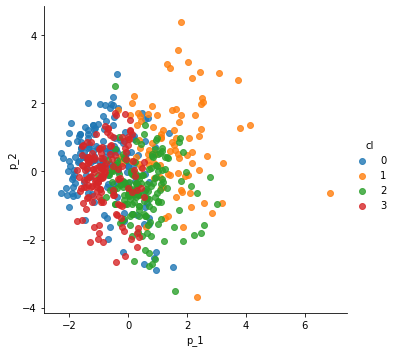

In [78]:
sns.lmplot(data=Xp,x='p_1',y='p_2',hue='cl',fit_reg=False)

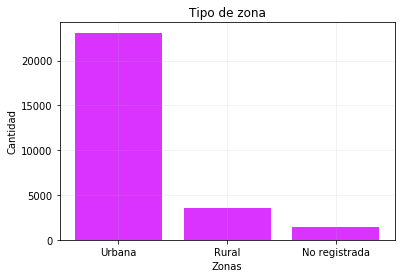

In [254]:
height = [23107, 3603, 1474]
bars = ('Urbana', 'Rural', 'No registrada')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#DA33FF')
plt.title('Tipo de zona')
plt.xlabel('Zonas')
plt.ylabel('Cantidad')
plt.xticks(y_pos, bars)
plt.grid(True, alpha=0.2)
plt.show()

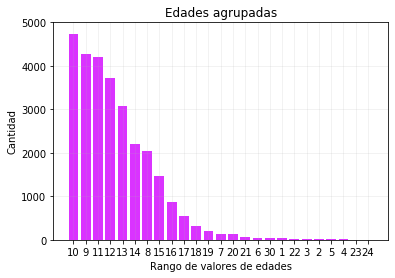

In [253]:
height = [4741, 4274, 4197, 3719, 3079, 2202, 2047, 1471,  865,  549,  322, 196,  130,  126,   65,   41,   40,   31,   29,   16,   13,   11, 11,    5,    4]
bars = (10,9,11,12,13,14,8,15,16,17,18,19,7,20,21,6,30,1,22,3,2,5,4,23,24)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#DA33FF')
plt.title('Edades agrupadas')
plt.xlabel('Rango de valores de edades')
plt.ylabel('Cantidad')
plt.xticks(y_pos, bars)
plt.grid(True, alpha=0.2)
plt.ylim(0,5000)
plt.show()

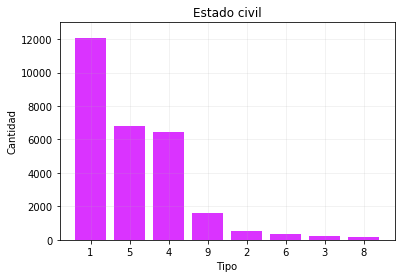

In [262]:
height = [12060,  6814,  6435,  1615,   524,   354,   239,   143]
bars = (1,5,4, 9,2, 6 ,3, 8)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#DA33FF')
plt.title('Estado civil')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(y_pos, bars)
plt.grid(True, alpha=0.2)
plt.ylim(0,13000)
plt.show()

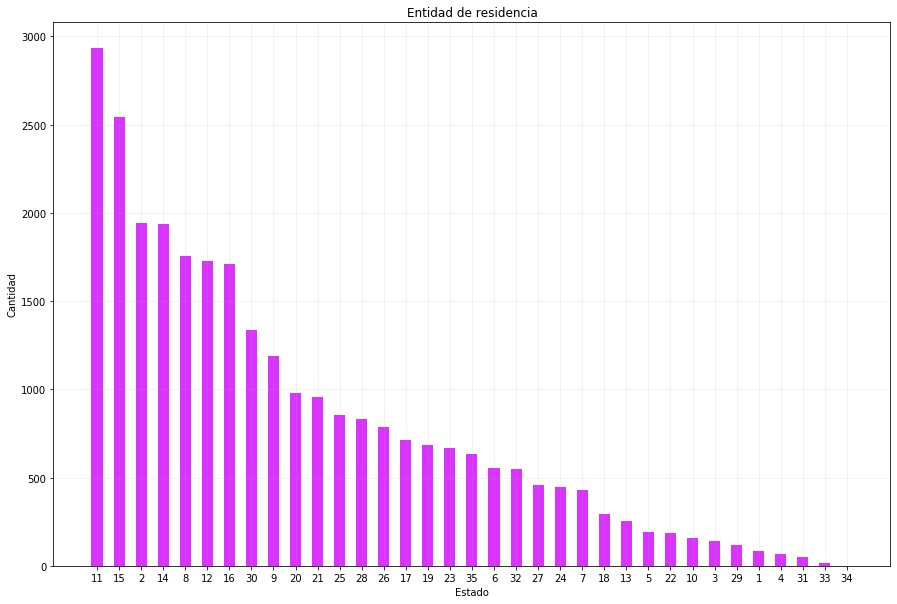

<Figure size 3600x6840 with 0 Axes>

In [298]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
height = [2934, 2544, 1943, 1938, 1755, 1725, 1710, 1338, 1191,  977,  959,
        854,  833,  789,  715,  682,  666,  633,  555,  548,  459,  445,
        427,  293,  254,  193,  186,  160,  142,  117,   83,   69,   52,
         14,    1]
bars = (11, 15, 2, 14, 8, 12, 16, 30, 9, 20, 21, 25, 28, 26, 17, 19, 23, 35, 6, 32, 27, 24, 7, 18, 13, 5, 22, 10, 3, 29, 1, 4, 31, 33, 34)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, width=0.5, color = '#DA33FF')
plt.title('Entidad de residencia')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(y_pos, bars)
plt.grid(True, alpha=0.2)
plt.figure(figsize=(50,95))
plt.show()

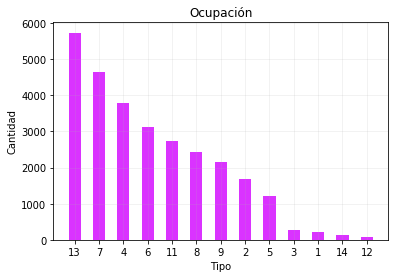

In [281]:
height = [5731, 4650, 3776, 3119, 2741, 2425, 2149, 1674, 1215,  269,  229,
        124,   82]
bars = (13, 7, 4, 6, 11, 8, 9, 2, 5, 3, 1, 14, 12)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, width=0.5, color = '#DA33FF')
plt.title('Ocupación')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(y_pos, bars)
plt.grid(True, alpha=0.2)
#plt.ylim(0,13000)
plt.show()

In [299]:
np.array(df2.escolarida)

array([ 4,  6,  4, ..., 12,  6,  9], dtype=int64)